# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
def select_state(csv_file, state: str):
    return csv_file[csv_file["STATE"] == state]

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
states_csv = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

In [4]:
# Complete
# Primary key = unique row identifier; YEAR_STATE format
# State = state in which data was taken
# Year = year in which data was taken
# Enroll = # of students enrolled in the given state in that year
# Revenue is the amount of money taken in depending on level
# Expenditures are money spent subdivided into types
# Scores are test results, with most being averages in the given time/place

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: GRADE 8 MATH

How many years of data are logged in our dataset? 

In [21]:
print(states_csv["YEAR"].nunique()) # total years as per request

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [6]:
rows_michigan = select_state(states_csv, "MICHIGAN") # select rows with state michigan for comparison
rows_ohio = select_state(states_csv, "OHIO") # Same as previous, for ohio
out_bool = rows_michigan["AVG_MATH_8_SCORE"].mean() > rows_ohio["AVG_MATH_8_SCORE"].mean() # Do comparison for quest
print(out_bool) # Print
# Ohio has a higher average across all years for Grade 8 math

False


Find the average for your chosen test across all states in 2019

In [7]:
rows_2019 = states_csv[states_csv["YEAR"] == 2019]["AVG_MATH_8_SCORE"] # Query year 2019, then get math 8 score
print(rows_2019.mean()) # take average as per thingy

281.2641509433962


For each state, find a maximum value for your chosen test score

In [22]:
max_state_dict = {}
for i, state in enumerate(states_csv["STATE"].unique()):
    row_state = select_state(states_csv, state)
    state_curmax = max(row_state["AVG_MATH_8_SCORE"])
    print(state, state_curmax)
    max_state_dict[state] = state_curmax    

ALABAMA 269.0
ALASKA nan
ARIZONA 283.0
ARKANSAS 279.0
CALIFORNIA 277.0
COLORADO 292.0
CONNECTICUT 289.0
DELAWARE 284.0
DISTRICT_OF_COLUMBIA 269.0
FLORIDA 281.0
GEORGIA 281.0
HAWAII 281.0
IDAHO 287.0
ILLINOIS nan
INDIANA 288.0
IOWA 286.0
KANSAS nan
KENTUCKY 282.0
LOUISIANA 273.0
MAINE 289.0
MARYLAND 288.0
MASSACHUSETTS 301.0
MICHIGAN 280.0
MINNESOTA 295.0
MISSISSIPPI 274.0
MISSOURI 286.0
MONTANA nan
NEBRASKA 288.0
NEVADA nan
NEW_HAMPSHIRE 296.0
NEW_JERSEY 296.0
NEW_MEXICO 274.0
NEW_YORK 283.0
NORTH_CAROLINA 286.0
NORTH_DAKOTA 293.0
OHIO 290.0
OKLAHOMA 279.0
OREGON nan
PENNSYLVANIA 290.0
RHODE_ISLAND 284.0
SOUTH_CAROLINA 282.0
SOUTH_DAKOTA nan
TENNESSEE 280.0
TEXAS 290.0
UTAH 287.0
VERMONT nan
VIRGINIA 290.0
WASHINGTON nan
WEST_VIRGINIA 274.0
WISCONSIN 289.0
WYOMING 289.0
DODEA nan
NATIONAL 285.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [9]:
states_csv["SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"] = states_csv["SUPPORT_SERVICES_EXPENDITURE"] / states_csv["ENROLL"] # These may not be extremely accurate to our target as it's total expenditure / total students
# rather than grade 8 expenditure / grade 8 students
states_csv["TOTAL_EXPENDITURE_PER_STUDENT"] = (states_csv["INSTRUCTION_EXPENDITURE"] + states_csv["SUPPORT_SERVICES_EXPENDITURE"]) / states_csv["ENROLL"]
states_csv["EXPENDITURE_TYPES_RATIO"] = states_csv["INSTRUCTION_EXPENDITURE"] / states_csv["SUPPORT_SERVICES_EXPENDITURE"] # This may not be the most useful; I would suspect this to show no real correlation or patter, but this would be interesting to see

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

-- Added support_services_expenditure_per_student: This is to see the returns of support services, and to infer the helpfulness of such expenditure. I would plot this against the target data to see if there's a positive correlation.

-- Added ratio of instruction to support services expenditure to find a (hopefully) optimal ratio that keeps financial balance

Ideas:
-- Year over year increase in local expenditure
-- 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

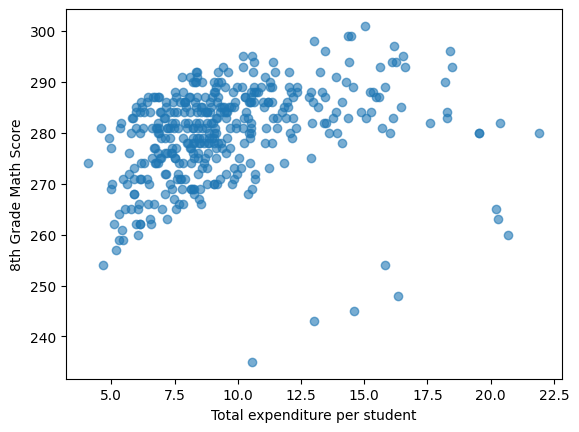

In [23]:
plt.scatter(states_csv["TOTAL_EXPENDITURE_PER_STUDENT"], states_csv["AVG_MATH_8_SCORE"], alpha = 0.6)
plt.xlabel('Total expenditure per student')
plt.ylabel('8th Grade Math Score')

plt.show()

Total expenditure per student vs average 8th grade math score

 This appears to show a positive correlation between 8th grade math score and the total expenditure per student expenditure,
 which is a fairly obvious result. Notably, the data seems to taper off towards the end. 
 In spite of the obvious, there exist datapoints which do not follow this trend which tend to have high expenditure, but low math scores.
 This may indicate other related issues in these states, which should be more closely observed.

**Visualization 2**

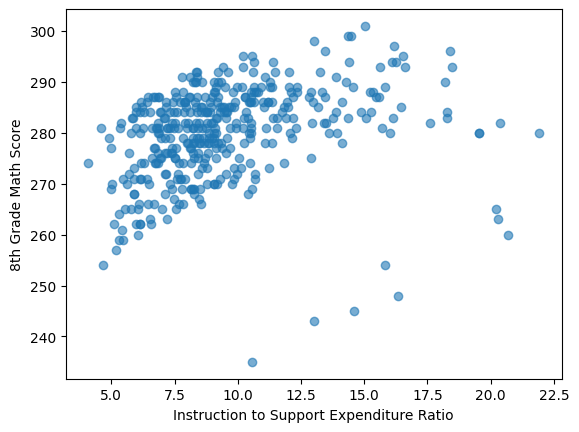

In [11]:
# Maybe school size vs average math 8 score
plt.scatter(states_csv["TOTAL_EXPENDITURE_PER_STUDENT"], states_csv["AVG_MATH_8_SCORE"], alpha = 0.6)
plt.xlabel('Instruction to Support Expenditure Ratio')
plt.ylabel('8th Grade Math Score')

plt.show()


**<CAPTION FOR VIZ 2>**

 Support expenditure per student seems to be positive in cases of low expenditure (under 1.25), however more data is likely required as the sample size for this is only six data points
 Otherwise, there is no real pattern; this metric does not appear to be a useful predictor of the response variable.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
# X =
# y = 
X = states_csv[["ENROLL", "AVG_MATH_8_SCORE", "TOTAL_EXPENDITURE_PER_STUDENT", "SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"]].dropna()
y = states_csv.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0) # Using 0.3 for 70/30 split as per tutorial

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [15]:
# import your sklearn class here
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [16]:
# create your model here
# model = RandomForestRegressor()
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

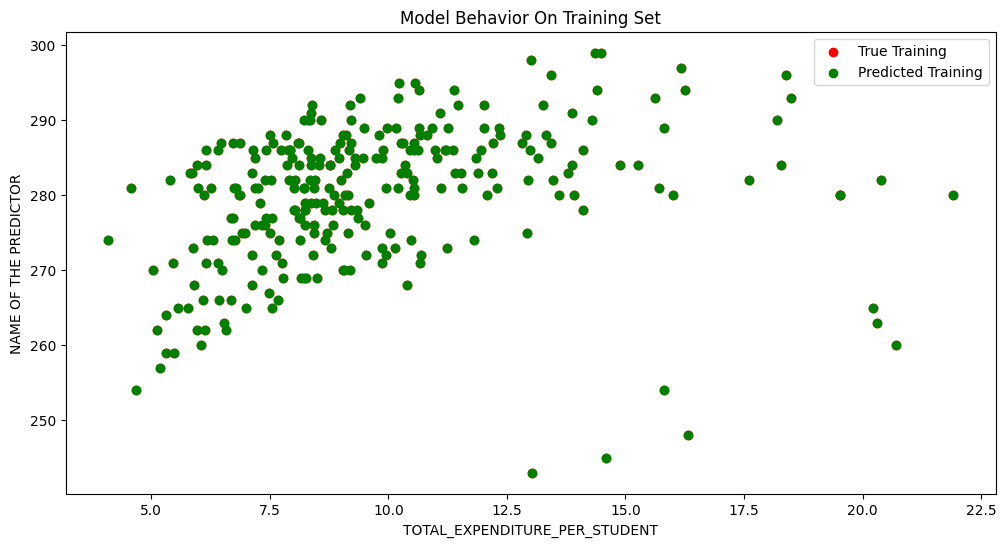

In [19]:
col_name = "TOTAL_EXPENDITURE_PER_STUDENT"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

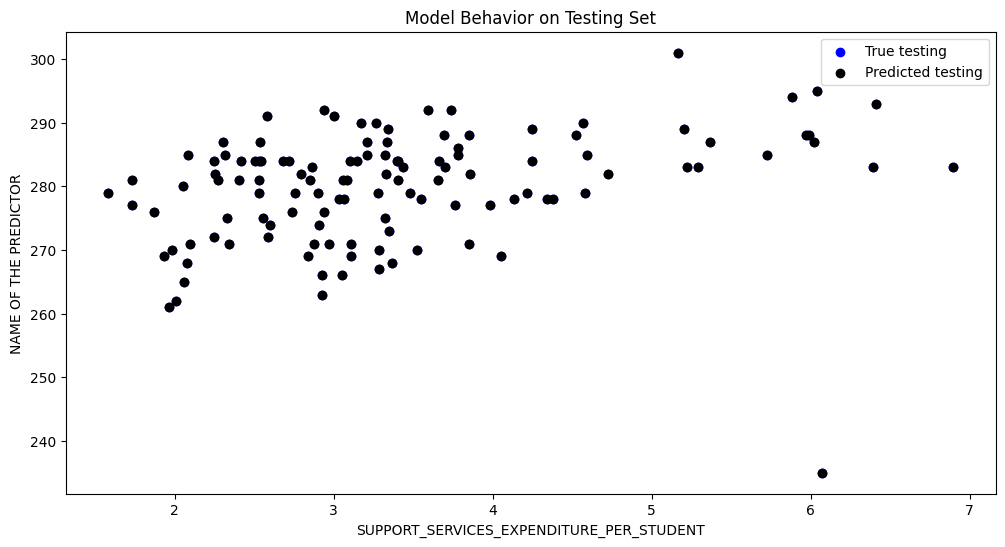

In [20]:
col_name = "SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")